<a href="https://colab.research.google.com/github/shivani-panicker/Analyzing-and-Ranking-Trading-Account-Performance/blob/main/innobyte_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
file_path = 'Amazon Sale Report.csv'
df = pd.read_csv(file_path)

In [3]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [4]:
df.drop(columns=['New', 'PendingS'], inplace=True)

In [5]:
df.dropna(subset=['Order ID'], inplace=True)

In [6]:
df['Amount'].fillna(0, inplace=True)

<ipython-input-6-1e4319d07bb5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)


In [7]:
df['Qty'].fillna(0, inplace=True)

<ipython-input-7-afecf64e839c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Qty'].fillna(0, inplace=True)


In [8]:
df['currency'].fillna('USD', inplace=True)

<ipython-input-8-600984be4171>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna('USD', inplace=True)


In [9]:
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

<ipython-input-9-395b238f9417>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna('Unknown', inplace=True)
<ipython-input-9-395b238f9417>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [10]:
df['fulfilled-by'].fillna('Unknown', inplace=True)

<ipython-input-10-9cbb08f9ce4a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fulfilled-by'].fillna('Unknown', inplace=True)


In [11]:
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-13-4ac1f8d99197>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [14]:
df['Year-Month'] = df['Date'].dt.to_period('M')

**SALES OVERVIEW**

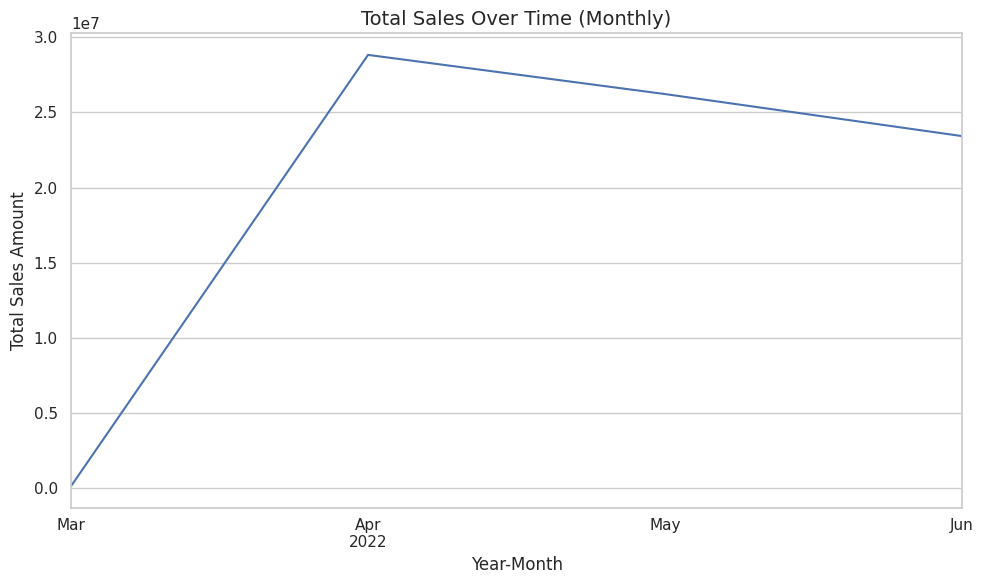

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# 1. Total Sales Over Time
df['Year-Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Year-Month')['Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='b')
plt.title('Total Sales Over Time (Monthly)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

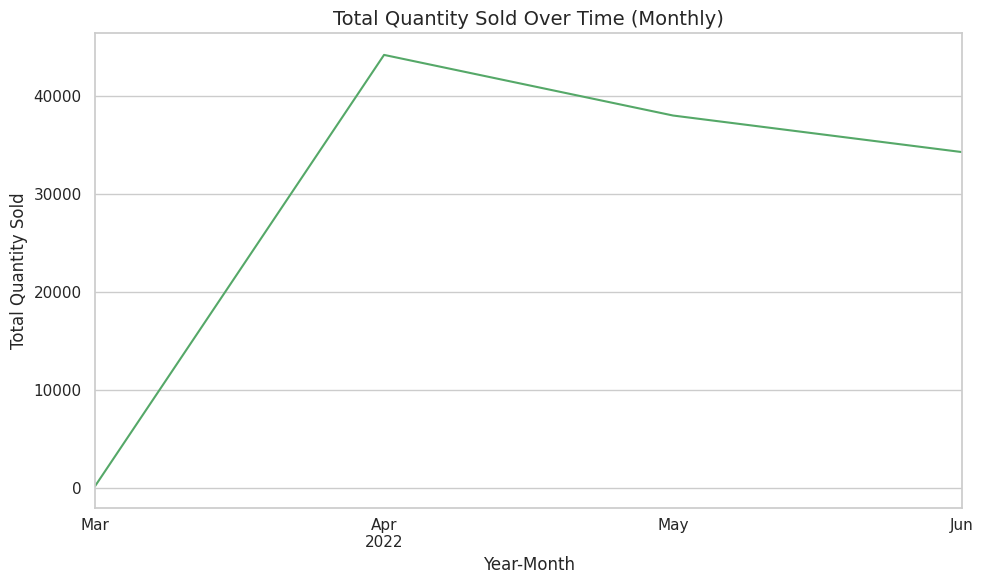

In [16]:
# 2. Total Quantity Sold Over Time
monthly_quantity = df.groupby('Year-Month')['Qty'].sum()
plt.figure(figsize=(10, 6))
monthly_quantity.plot(kind='line', color='g')
plt.title('Total Quantity Sold Over Time (Monthly)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**PRODUCT ANALYSIS**

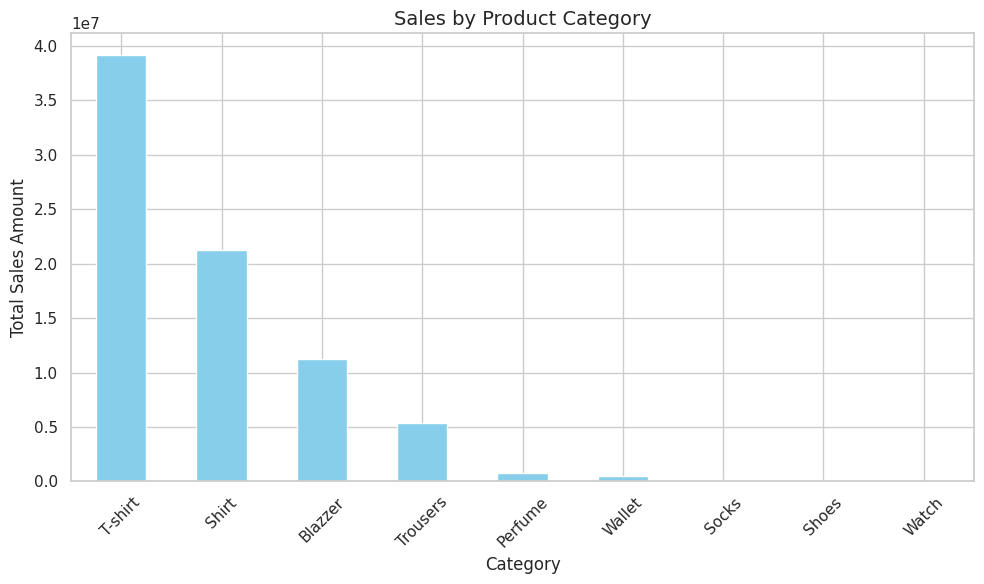

In [17]:
# 1. Product Category Distribution
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

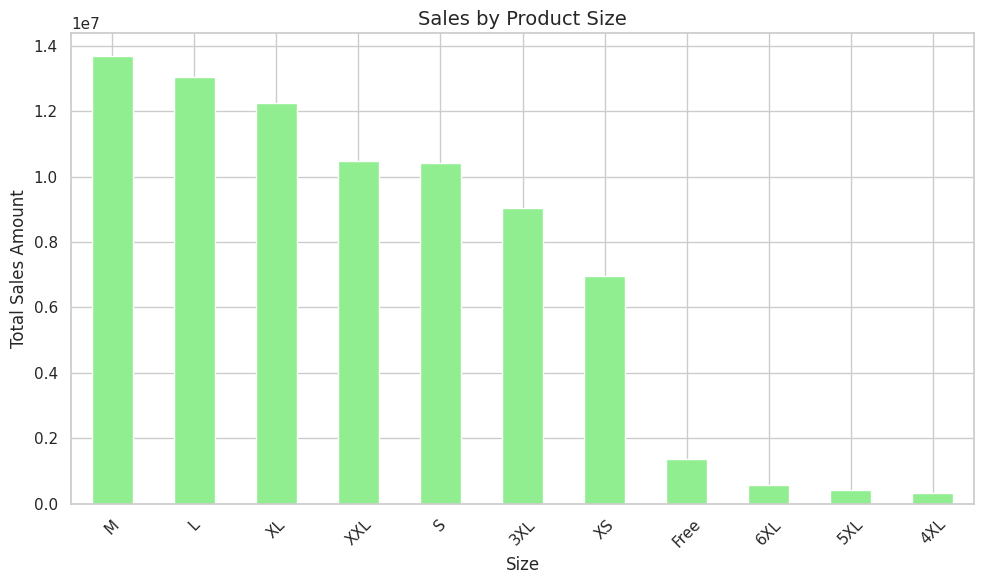

In [18]:
# 2. Product Size Distribution
size_sales = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Product Size', fontsize=14)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

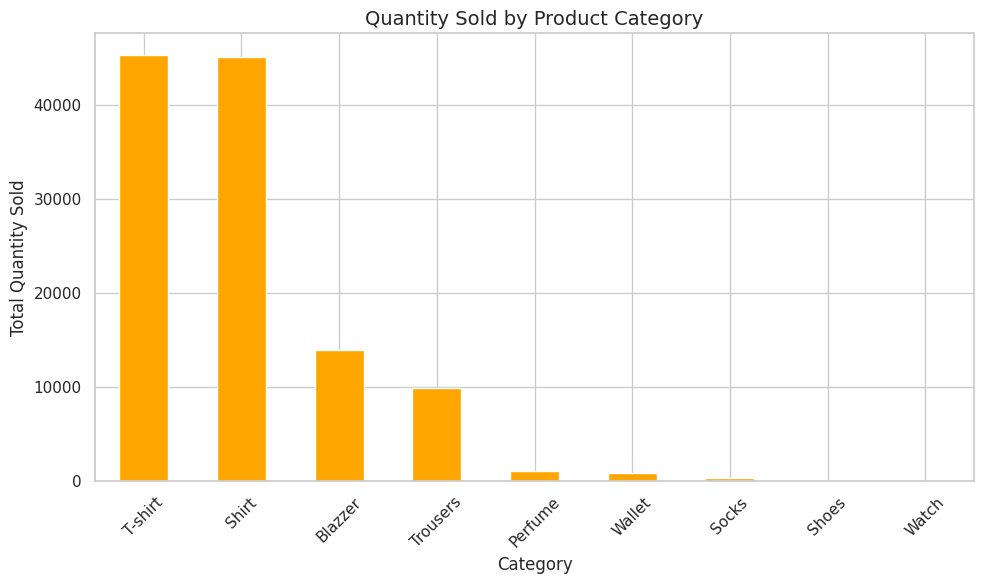

In [19]:
# 3. Most Popular Products (based on Quantity sold)
product_qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_qty.plot(kind='bar', color='orange')
plt.title('Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**FULLFILLMENT ANALYSIS**

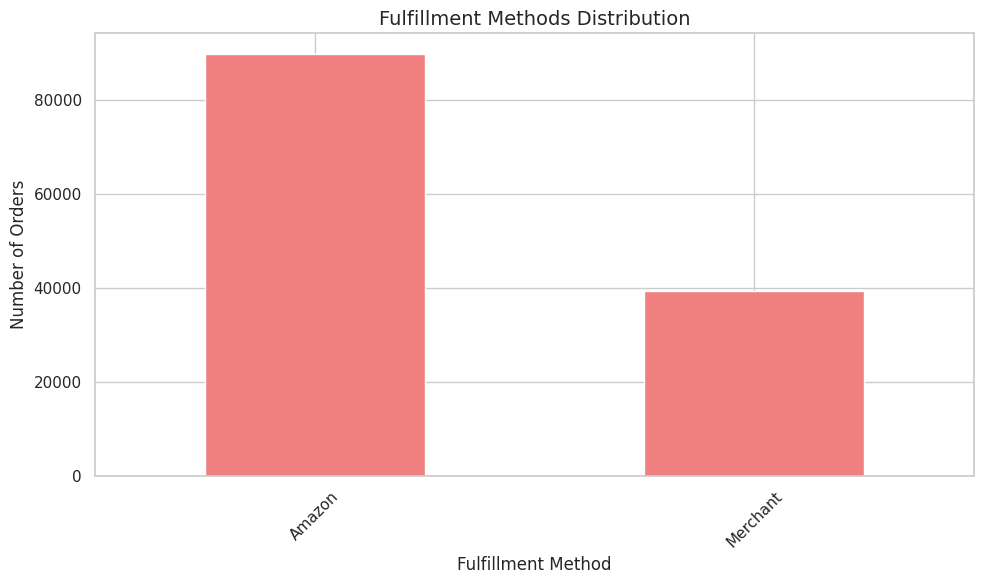

In [20]:
# 1. Fulfillment Method Distribution
fulfillment_counts = df['Fulfilment'].value_counts()
plt.figure(figsize=(10, 6))
fulfillment_counts.plot(kind='bar', color='lightcoral')
plt.title('Fulfillment Methods Distribution', fontsize=14)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

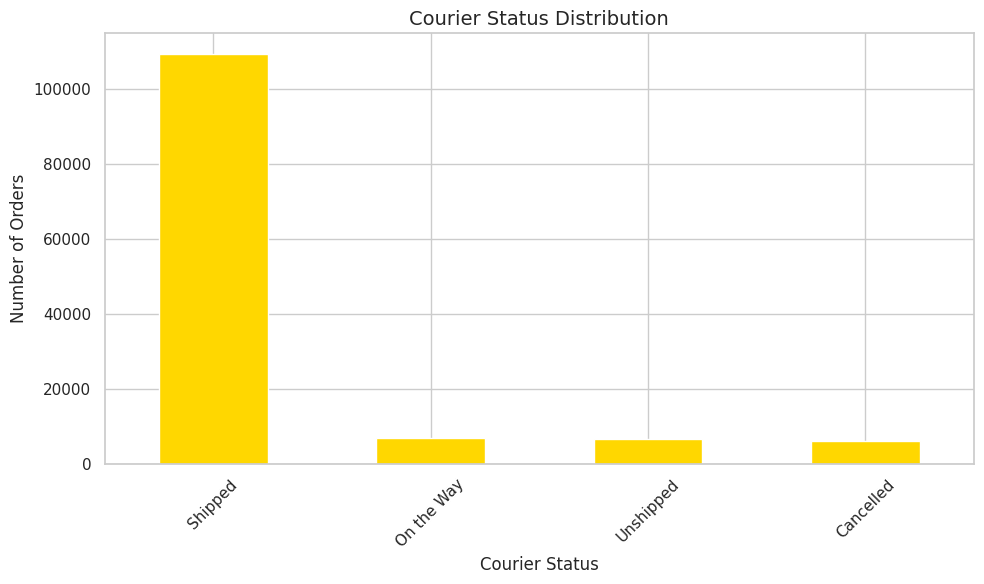

In [21]:
courier_status_counts = df['Courier Status'].value_counts()
plt.figure(figsize=(10, 6))
courier_status_counts.plot(kind='bar', color='gold')
plt.title('Courier Status Distribution', fontsize=14)
plt.xlabel('Courier Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**GEOGRAPHICAL ANALYSIS**

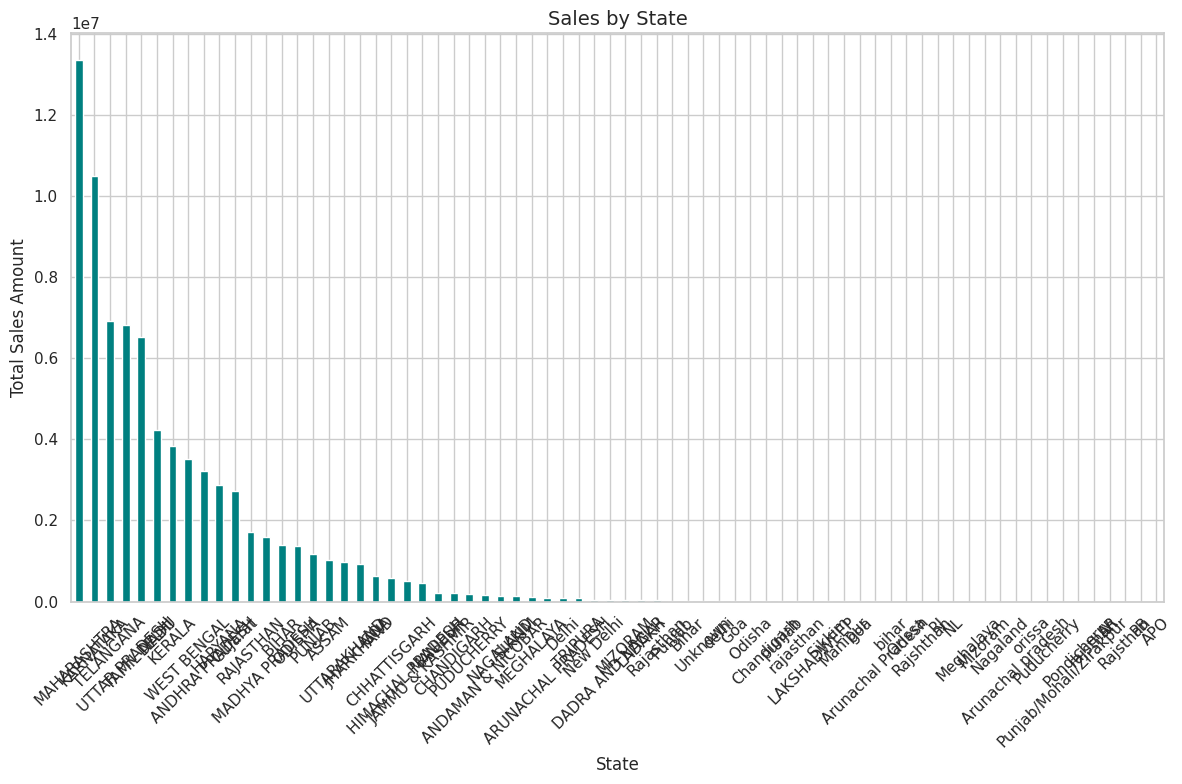

In [22]:
# 1. Sales by State
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_sales.plot(kind='bar', color='teal')
plt.title('Sales by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

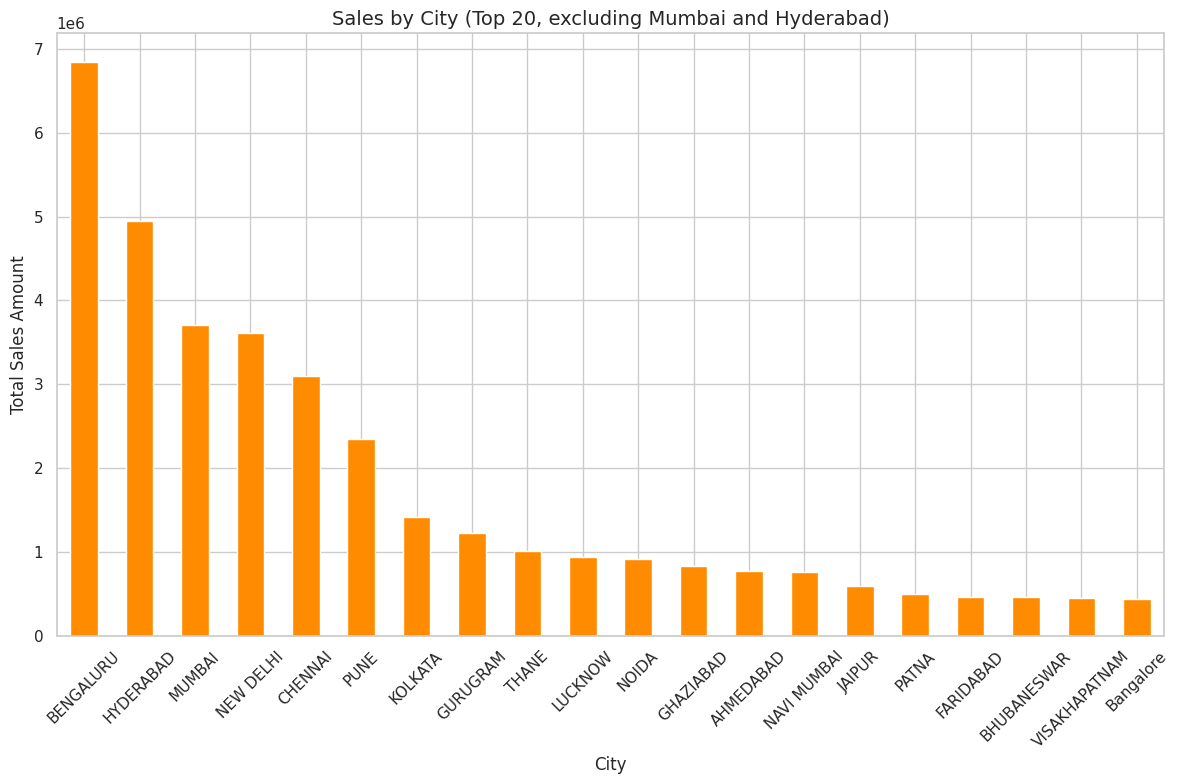

In [27]:
df_filtered = df[~df['ship-city'].isin(['Mumbai', 'Hyderabad'])]

city_sales = df_filtered.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(20)  # Top 20 cities
plt.figure(figsize=(12, 8))
city_sales.plot(kind='bar', color='darkorange')
plt.title('Sales by City (Top 20, excluding Mumbai and Hyderabad)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

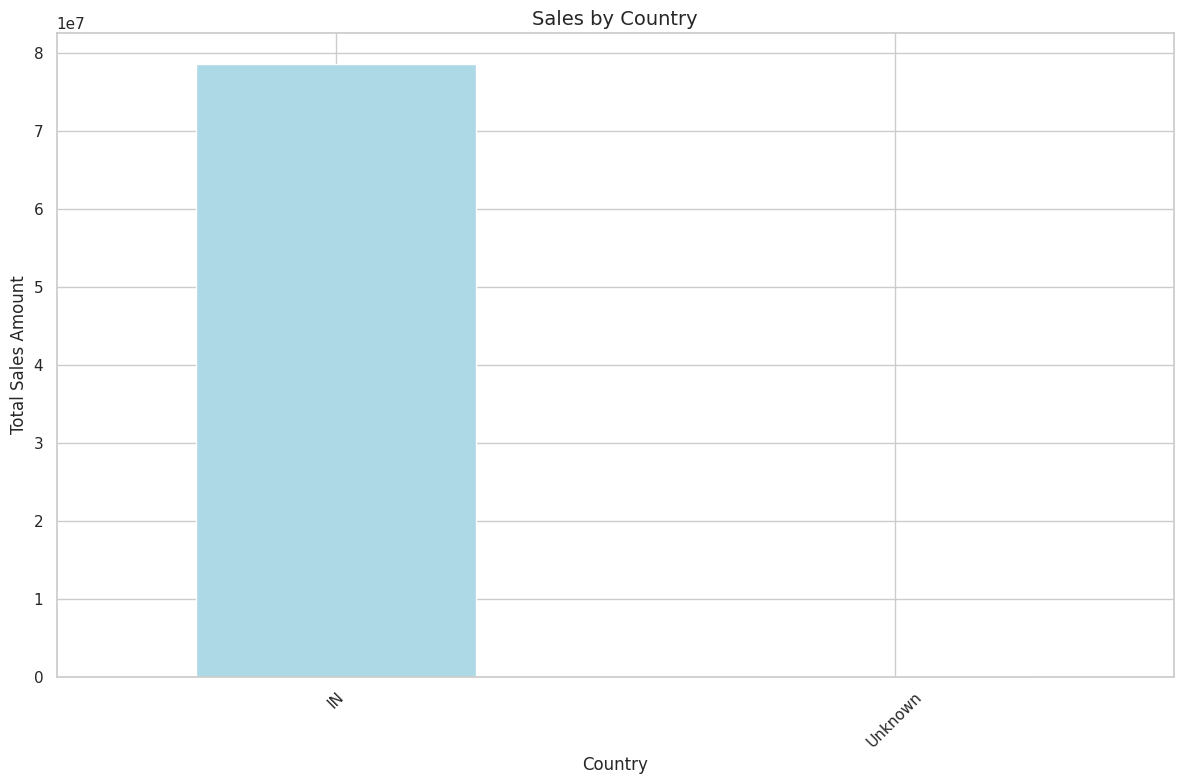

In [24]:
# 3. Sales by Country
country_sales = df.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar', color='lightblue')
plt.title('Sales by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*  Sales Trends:

Insight: After analyzing the total sales data over time, the highest sales periods were observed in *APRIL 2022*, while the lowest sales were recorded in *MARCH 2022*.

*  Top Products:

Insight: Based on the product category analysis, the top-selling products include *t-shirt*. Additionally, the most popular size is *M*.




*   Fulfillment Effectiveness:

Insight: Upon reviewing the Courier Status data, a significant number of orders is delivered by *Amazon* via *shipping*.




*   Geographical Focus:

Insight: The sales analysis reveals that the regions with the highest sales are *Bengaluru, Hyderabad and then followed by Mumbai* while areas with lower sales include *Banglore, Vishakapatnam and Bhubaneshwar* .




